# Application Exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from apm.data.prices import load_mmi_data

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting

## 1. Build a minimum variance fully invested portfolio from MMI constituent stocks

- what are the betas of each constituent stocks with respect to this portfolio

In [3]:
data = load_mmi_data()
data

[*********************100%***********************]  19 of 19 completed


Ticker,AXP,CVX,DD,DIS,DOW,GE,GM,IBM,IP,JNJ,KO,KODK,MCD,MMM,MRK,PG,PM,T,XOM
Date,,,,,,,,,,,,,,,,,,,
2019-03-20,101.241821,92.608925,28.734625,106.161964,34.132931,49.452869,34.181152,99.528442,31.548450,113.527641,37.032738,3.24,158.202209,136.038345,63.478352,85.872879,63.678970,14.213197,59.387215
2019-03-21,102.201500,93.477890,29.209970,104.878265,33.570900,49.694809,34.504471,100.840302,31.953535,114.197487,37.016472,3.18,159.399597,136.893890,64.151176,86.522896,64.500031,14.469416,59.730484
2019-03-22,100.044495,91.420570,28.165262,104.463219,33.310455,48.291553,33.663795,99.421524,31.010647,113.213425,37.358086,2.94,159.775925,133.661133,63.640751,85.822212,63.980728,14.474072,58.773788
2019-03-25,99.660645,91.272041,27.825737,104.038528,33.687416,47.807655,33.950184,99.229012,30.982714,112.965340,37.439423,2.90,158.843674,132.714111,63.687164,86.075493,62.729961,14.334318,58.364815
2019-03-26,100.081078,92.193016,27.778725,106.306747,33.481800,48.872208,34.061054,99.970490,31.576384,114.586090,37.935577,2.92,160.348938,135.346130,64.127968,86.970337,62.957378,14.623146,59.124325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-18,375.519989,147.690002,40.509998,111.870003,23.040001,301.690002,81.169998,300.450012,38.599998,208.309998,70.360001,8.06,319.649994,161.759995,100.690002,145.520004,157.309998,24.260000,116.540001
2025-12-19,376.510010,147.750000,41.259998,111.239998,23.260000,307.209991,82.349998,300.980011,38.240002,206.369995,70.059998,8.33,315.839996,161.960007,101.089996,144.460007,156.839996,24.150000,116.690002
2025-12-22,380.850006,149.800003,41.480000,112.379997,23.420000,314.730011,83.029999,302.790009,39.290001,207.320007,70.209999,8.80,316.220001,160.000000,104.720001,142.690002,159.699997,24.299999,118.150002


Estimate the covariance matrix

In [3]:
mu = mean_historical_return(prices=data)
S = CovarianceShrinkage(prices=data).ledoit_wolf()

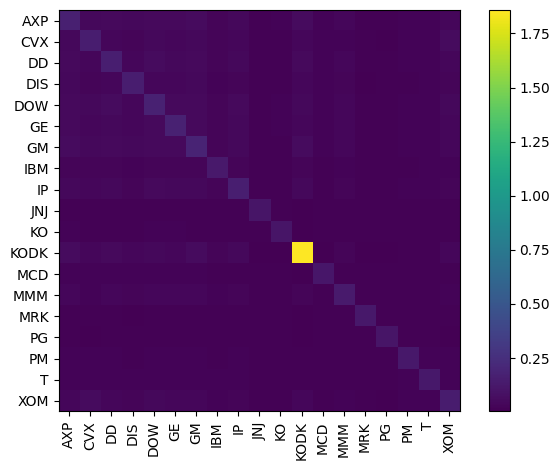

In [4]:
plotting.plot_covariance(S, plot_correlation=False, show_tickers=True)
plt.show()

Minimum variance portfolio

In [5]:
ef = EfficientFrontier(mu, S)
min_var_weights = ef.min_volatility()

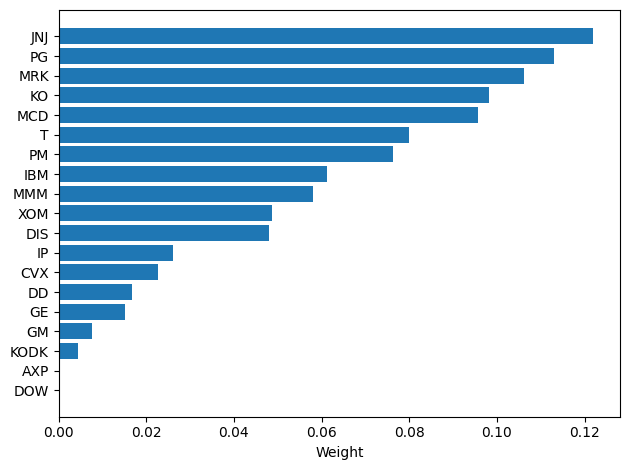

In [6]:
plotting.plot_weights(min_var_weights)
plt.show()

The betas of each asset with respect to the minimum variance portfolio is 1.